<a href="https://colab.research.google.com/github/saranshdabas/CS294-Notebook/blob/main/CS_294.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
sign_df = pd.read_csv('/content/sign_mnist_train.csv')

In [ ]:
def memorize(data, labels, cls):
  thresholds = 0
  sum = data.sum(axis = 1)
  merge = pd.concat([sum, labels], axis = 1)
  #print(merge.head())
  merge_sorted = merge.sort_values(by=0, ascending=False)

  for index,row in merge_sorted.iterrows():
    if not row['label'] == cls:
      thresholds += 1
      cls = row['label']

  return np.log2(thresholds+1)

def get_mec(df):
  MEC = 0
  for cls in range(0,26):
    if cls == 9 or cls == 25:
      continue
    total = df['label'].value_counts()[cls]
    #print(total)
    MEC += memorize(df.iloc[:,1:], df['label'], cls) * total
  
  MEC /= len(df)
  return MEC

print(get_mec(sign_df))

14.576304608564367


In [ ]:
old_columns = sign_df.columns[1:].tolist()
label = sign_df.columns[0]
new_columns = sign_df.columns[1:].tolist()
new_columns.append(label)


In [ ]:
print(new_columns)

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [ ]:
new_sign_df = sign_df[new_columns]
new_sign_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202,3
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149,6
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195,2
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163,2
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179,13


In [ ]:
new_sign_df.to_csv('sign_mnist_train_cleaned.csv')

In [ ]:
#Capacity Progression
sample_size = [5,10,20,40,80,100]
capacity_progression = []
for size in sample_size:
  sample = sign_df.sample(frac=size/100)
  capacity_progression.append(math.ceil(get_mec(sample)))

In [ ]:
print(capacity_progression)

[11, 12, 13, 14, 15, 15]


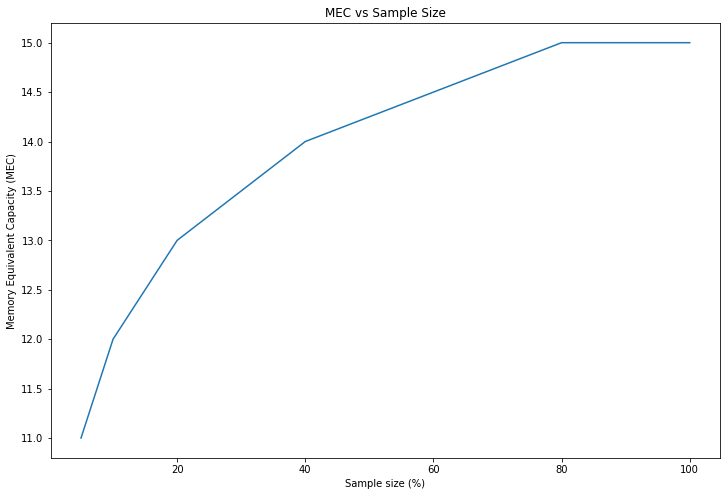

In [ ]:
#Plotting Capacity Progression
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.xlabel('Sample size (%)')
plt.ylabel('Memory Equivalent Capacity (MEC)')
plt.title('MEC vs Sample Size')
sns.lineplot(x = sample_size, y = capacity_progression);

In [ ]:
generalization = 238.74

def resilience(generalization):
  resilience = 20 * math.log(generalization, 10)
  return resilience

print(resilience(generalization))

-47.55850379060064
